# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(19680801)

In [2]:
df = pd.read_excel('geo.xlsx')

In [3]:
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
X = df[['x', 'y']]

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

### KMeans

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [7]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

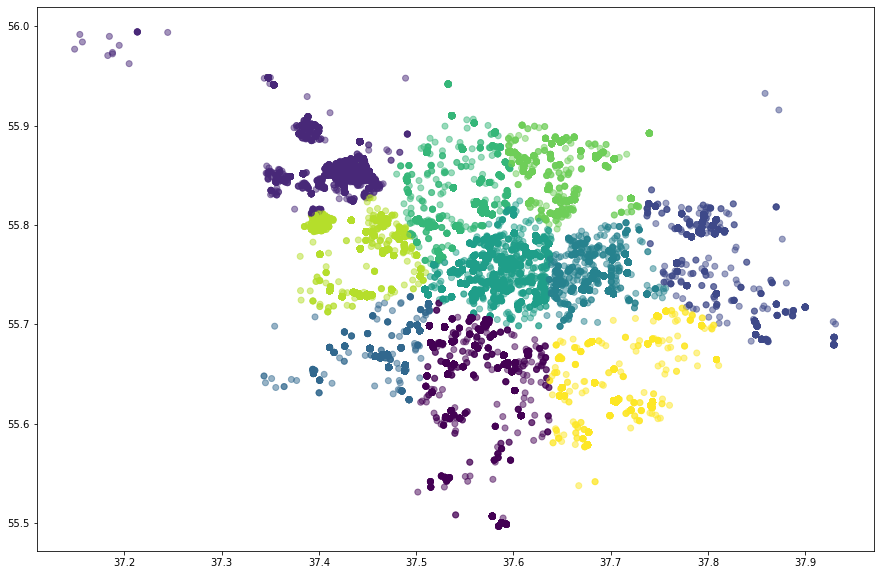

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(X['x'], X['y'], alpha = 0.5, c = kmeans.labels_)
plt.show()

 Разделил карту Москвы на 10 районов

### Скопления голосов

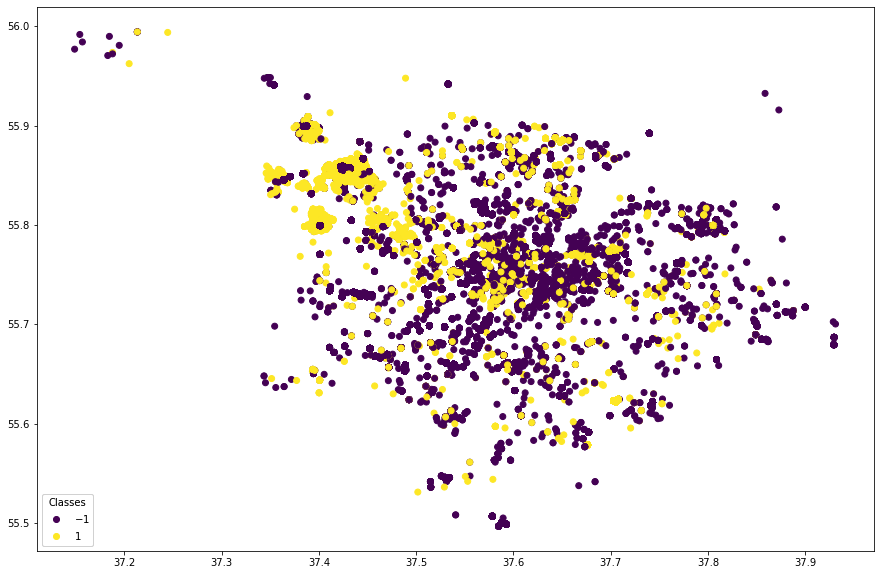

In [9]:
fig, ax = plt.subplots()
scatter = ax.scatter(X['x'], X['y'], c = df['comment_class'])

fig.set_figheight(10)
fig.set_figwidth(15)

legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

Из увиденного можно сделать вывод о том что на северо-западе Москвы положительно проголосовало большее число людей